### This notebook is an attempt to visualize eudex hashed strings in their phonetical space. For this we use a dataset containing medication names and their corresponding misspellings

#### 1. hash strings with eudex
#### 2. get their binary representation in a numpy array
#### 3. use UMAP to perform dimensionality reduction, with metric='hamming'
#### 4. plot the transformed data, with labels on true medication names. We should see clusters of misspellings centered around their closest true label


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from eudex import eudex
from umap import UMAP
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [2]:
meds = pd.read_csv('medication.csv')
meds.head()

,true,misspells
0,omeprazole,omaprazole omeprezole omeprizole omeperzole om...
1,paroxetine,paroxotine paroextine paroxitine paroxatine
2,klonopin,klonopim klonopin klonipin klonepin kolnopin c...
3,diazepam,diazepam diazepan diazepams oxazepam diazipam ...
4,fluoxetine,fluoextine fluoxentine fluoxitine fluoxetine f...


In [3]:
from itertools import chain
all_misspells = pd.Series(chain(*meds.misspells.str.split(' ')))
all_misspells.head()

0    omaprazole
1    omeprezole
2    omeprizole
3    omeperzole
4    omperazole
dtype: object

In [4]:
all_meds = pd.DataFrame({
    'medication' : pd.concat([meds.true, all_misspells]),
    'label' : [1] * len(meds) + [0] * len(all_misspells)
})
all_meds.sample(10)

,medication,label
217,trazodon,0
71,zyprea,0
54,klonazepam,0
94,zanax,0
13,paroxatine,0
145,oxycodin,0
89,amoxicllin,0
15,klonopin,0
39,diazepam,0
38,klononpin,0


In [5]:
def eudex_to_numpy(codes: pd.Series):
    assert codes.dtypes == np.uint64
    s = codes.apply(bin).str[2:].str.zfill(64)
    return np.array(s.apply(list).tolist(), dtype=np.uint8)

X = eudex_to_numpy(all_meds.medication.map(eudex))
X[:3]

array([[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]],
      dtype=uint8)

In [6]:
from umap import UMAP
um = UMAP(n_components=2, metric='hamming')
X_trans = um.fit_transform(X)
X_trans[:3]

/home/radon/miniconda3/envs/skmine/lib/python3.6/site-packages/umap/umap_.py:1530: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


array([[14.210166 , 26.432388 ],
       [ 3.9629984, -1.8967787],
       [19.055767 ,  3.863191 ]], dtype=float32)

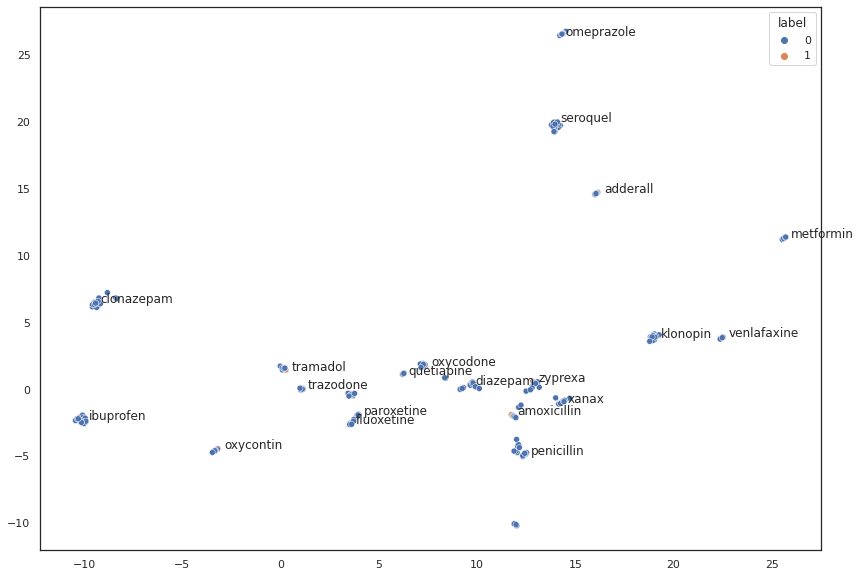

In [7]:
ax = sns.scatterplot(
    x=X_trans[:, 0], 
    y=X_trans[:, 1], 
    hue=all_meds.label,
    )

for val, (x, y) in zip(meds.true, X_trans[all_meds.label == 1]):
    ax.text(x+.3, y, str(val))